In [1]:
import os
import re
from Bio.PDB import PDBParser
from Bio.SeqUtils import seq1
from Bio import SeqIO
from pathlib import Path
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
from utils import similarity_matrix

## an example

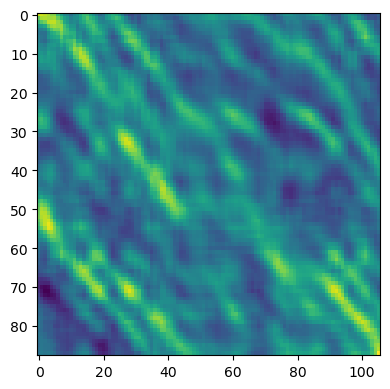

In [10]:
prostt5_embs = pickle.load(open("../embeddings/prostt5_aligned_embs.pkl", "rb"))
window_size=5

emb1 = prostt5_embs['d1slca__146']
emb2 = prostt5_embs['d1sq9a__147']
sim_matrix, (best_emb1, best_emb2, best_score) = similarity_matrix(emb1,emb2,window_size)
plt.figure(figsize=(4, 4))
plt.imshow(sim_matrix, aspect='auto', cmap='viridis')

plt.tight_layout()
plt.show()

## for aligned embs

In [15]:
embeddings_by_method = {
    'ProstT5': pickle.load(open("../embeddings/prostt5_aligned_embs.pkl", "rb"))
}

df = pd.read_csv("../datasets/malisam_sequences_aligned.csv")
df["EMBEDDINGid"] = df["SCOPid"].astype(str) + '_' + df.index.astype(str) 

matrix_dict = {}
for comparison_id, group in df.groupby('PAIR'):
    ids = group['EMBEDDINGid'].drop_duplicates().tolist()
    for id1, id2 in combinations(ids, 2):
        for method, protein_embeddings in embeddings_by_method.items():
            try:
                emb1 = protein_embeddings[id1]
                emb2 = protein_embeddings[id2]
                seq_length1 = emb1.shape[0]
                seq_length2 = emb2.shape[0]

                sim_matrix, _ = similarity_matrix(emb1, emb2, 1)

                matrix_dict[comparison_id] = sim_matrix
            except:
                matrix_dict[comparison_id] = None

#with open("carp_aligned_matrix_data_5.pkl", "wb") as f:
#    pickle.dump(matrix_dict, f)
list(matrix_dict.items())[0]

('d1a05a_d1dgsa3',
 array([[ 0.68241378,  0.22974259,  0.08829296, ..., -0.04570245,
          0.14071619,  0.01923674],
        [ 0.18760573,  0.27963114,  0.23216805, ..., -0.05216505,
          0.12105911,  0.13802587],
        [ 0.17480075,  0.22423746,  0.24567643, ..., -0.03656482,
          0.06012112,  0.08228717],
        ...,
        [ 0.0580373 ,  0.03850107,  0.01506763, ...,  0.27825778,
          0.29717494,  0.0614308 ],
        [ 0.1181117 ,  0.10388878,  0.06248102, ...,  0.20623645,
          0.47488663,  0.14493535],
        [ 0.02851121,  0.08356739,  0.06148265, ...,  0.0213939 ,
          0.19243832,  0.79402324]], shape=(80, 96)))

## for complete embs

In [ ]:
def pdb_root(x):
    s = x.strip()
    s = re.sub(r'^pdb:', '', s, flags=re.I)       
    s = s.replace('.', '_')                       
    m = re.search(r'([0-9][A-Za-z0-9]{3})', s)
    return m.group(1).lower() if m else s.lower()

data_name = 'prostt5_aligned_matrix_data'
protein_embeddings = pickle.load(open("/home/zim003/slidingwindow/prostt5/prostt5_embs_safe.pkl", "rb"))

df = pd.read_csv("/home/zim003/mygithubrepos/SlidingwinAlignment/javi/malisam_complete_sequences_aligned.csv")
df["EMBEDDINGid"] = df["SCOPid"].astype(str) + '-' + df["CHAIN"].astype(str) + '_' + df.index.astype(str)

window_list = [5]
for window in window_list:
    matrix_dict = {}
    for comparison_id, group in df.groupby('PAIR'):
        entities = (
            group[['EMBEDDINGid', 'CHAIN']]
            .drop_duplicates()
            .itertuples(index=False, name=None)  
        )
        for (id1, ch1), (id2, ch2) in combinations(entities, 2):     
                   
            if pdb_root(id1) == pdb_root(id2):
                continue

            emb1 = protein_embeddings[id1]
            emb2 = protein_embeddings[id2]
            seq_length1 = emb1.shape[0]
            seq_length2 = emb2.shape[0]

            sim_matrix, _ = similarity_matrix(emb1, emb2, window)

            matrix_dict[id1+'-'+id2] = sim_matrix

    #with open(f"{data_name}_{window}.pkl", "wb") as f:
        #pickle.dump(matrix_dict, f)
    matrix_dict

id1 d1h5wa_-A_209 ch1 A id2 d1h5wa_-B_210 ch2 B skip because same pdb root
id1 d1izna_-A_244 ch1 A id2 d1izna_-B_245 ch2 B skip because same pdb root
id1 d1izna_-A_212 ch1 A id2 d1izna_-B_213 ch2 B skip because same pdb root
id1 d1izna_-A_261 ch1 A id2 d1izna_-B_262 ch2 B skip because same pdb root
id1 d1k9ka_-A_215 ch1 A id2 d1k9ka_-B_216 ch2 B skip because same pdb root
id1 d1knza_-A_218 ch1 A id2 d1knza_-B_219 ch2 B skip because same pdb root
id1 d1knza_-A_221 ch1 A id2 d1knza_-B_222 ch2 B skip because same pdb root
id1 d1mk5a_-A_226 ch1 A id2 d1mk5a_-B_227 ch2 B skip because same pdb root
id1 d1mw5a_-A_229 ch1 A id2 d1mw5a_-B_230 ch2 B skip because same pdb root
id1 d1okra_-A_234 ch1 A id2 d1okra_-B_235 ch2 B skip because same pdb root
id1 d1okra_-A_237 ch1 A id2 d1okra_-B_238 ch2 B skip because same pdb root
id1 d1omoa_-A_240 ch1 A id2 d1omoa_-B_241 ch2 B skip because same pdb root
id1 d1i7b.1-B_242 ch1 B id2 d1i7b.1-A_243 ch2 A skip because same pdb root
id1 d1qo0d_-D_249 ch1 D i